In [1]:
# enable environment before execute notebook
# workon my-virtualenv-name  # activate your virtualenv, if you haven't already
# pip install ipykernel
# python -m ipykernel install --user --name=transformers-course
# select the proper kernel on the notebook
!pip install librosa
!pip install audio_metadata
!pip install matplotlib

In [2]:
from transformers import WhisperTokenizer
from datasets import load_dataset, DatasetDict
import librosa
import audio_metadata
import librosa.display
from matplotlib import pyplot as plt
from scipy.io import wavfile
import IPython

In [3]:
common_voice = DatasetDict()
language = 'es'
dataset_name = "mozilla-foundation/common_voice_11_0"

In [4]:
common_voice["train"] = load_dataset(dataset_name, language, split="train+validation", use_auth_token=True)
common_voice["test"] = load_dataset(dataset_name, language, split="test", use_auth_token=True)

Found cached dataset common_voice_11_0 (/home/jgonzalez/.cache/huggingface/datasets/mozilla-foundation___common_voice_11_0/es/11.0.0/2c65b95d99ca879b1b1074ea197b65e0497848fd697fdb0582e0f6b75b6f4da0)
Found cached dataset common_voice_11_0 (/home/jgonzalez/.cache/huggingface/datasets/mozilla-foundation___common_voice_11_0/es/11.0.0/2c65b95d99ca879b1b1074ea197b65e0497848fd697fdb0582e0f6b75b6f4da0)


In [5]:
print(common_voice)

DatasetDict({
    train: Dataset({
        features: ['client_id', 'path', 'audio', 'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accent', 'locale', 'segment'],
        num_rows: 245987
    })
    test: Dataset({
        features: ['client_id', 'path', 'audio', 'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accent', 'locale', 'segment'],
        num_rows: 15520
    })
})


In [6]:
tokenizer = WhisperTokenizer.from_pretrained(
        "openai/whisper-small", 
        language="Spanish", 
        task="transcribe"
    )

In [7]:
input_str = common_voice["train"][0]["sentence"]
labels = tokenizer(input_str).input_ids
decoded_with_special = tokenizer.decode(labels, skip_special_tokens=False)
decoded_str = tokenizer.decode(labels, skip_special_tokens=True)

In [8]:
print(f"Input:                 {input_str}")
print(f"Tokens:                {labels}")
print(f"Decoded w/ special:    {decoded_with_special}")
print(f"Decoded w/out special: {decoded_str}")
print(f"Are equal:             {input_str == decoded_str}")

Input:                 ¿ Qué tal a tres de cinco ?
Tokens:                [50258, 50262, 50359, 50363, 25073, 23662, 220, 32831, 257, 220, 83, 495, 368, 21350, 2506, 50257]
Decoded w/ special:    <|startoftranscript|><|es|><|transcribe|><|notimestamps|>¿ Qué tal a tres de cinco ?<|endoftext|>
Decoded w/out special: ¿ Qué tal a tres de cinco ?
Are equal:             True


In [9]:
from pprint import pprint
pprint(common_voice["train"][0])

{'accent': '',
 'age': '',
 'audio': {'array': array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
       -3.2585538e-06, -3.5239013e-06, -3.0528611e-06], dtype=float32),
           'path': '/home/jgonzalez/.cache/huggingface/datasets/downloads/extracted/fde0b56b17d045d78dca0e88e6e6f123554984ad50d19aeadb1c680e7a3c9e86/common_voice_es_18338585.mp3',
           'sampling_rate': 48000},
 'client_id': '34719bb7c7344da7733b85c9d7215d24326093f1a2cd3a445bdc6dfe9ec4a8c9fe9729a73f6c29764545276bff81ffa65d3944f6da7a3ee3c06d0eb124fac797',
 'down_votes': 1,
 'gender': '',
 'locale': 'es',
 'path': '/home/jgonzalez/.cache/huggingface/datasets/downloads/extracted/fde0b56b17d045d78dca0e88e6e6f123554984ad50d19aeadb1c680e7a3c9e86/common_voice_es_18338585.mp3',
 'segment': '',
 'sentence': '¿ Qué tal a tres de cinco ?',
 'up_votes': 2}


In [10]:
filename = '/home/jgonzalez/.cache/huggingface/datasets/downloads/extracted/fde0b56b17d045d78dca0e88e6e6f123554984ad50d19aeadb1c680e7a3c9e86/' + 'es_train_0/' + 'common_voice_es_18338585.mp3' 
print(filename)
audio_metadata.load(filename)

/home/jgonzalez/.cache/huggingface/datasets/downloads/extracted/fde0b56b17d045d78dca0e88e6e6f123554984ad50d19aeadb1c680e7a3c9e86/es_train_0/common_voice_es_18338585.mp3


<MP3({
    'filepath': '/home/jgonzalez/.cache/huggingface/datasets/downloads/extracted/fde0b56b17d045d78dca0e88e6e6f123554984ad50d19aeadb1c680e7a3c9e86/es_train_0/common_voice_es_18338585.mp3',
    'filesize': '35.48 KiB',
    'pictures': [],
    'streaminfo': <MP3StreamInfo({
        'bitrate': '64 Kbps',
        'bitrate_mode': <MP3BitrateMode.CBR>,
        'channel_mode': <MP3ChannelMode.MONO>,
        'channels': 1,
        'duration': '00:05',
        'layer': 3,
        'protected': False,
        'sample_rate': '48.0 KHz',
        'version': 1,
    })>,
    'tags': <ID3v2Frames({'encodersettings': ['Lavf56.40.101']})>,
})>

In [11]:
IPython.display.Audio(data=filename, rate=48000)

In [12]:
# !pip install matplotlib
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [23]:
def print_plot_play(x, Fs, text=''):
    """1. Prints information about an audio singal, 2. plots the waveform, and 3. Creates player
    
    Notebook: C1/B_PythonAudio.ipynb
    
    Args: 
        x: Input signal
        Fs: Sampling rate of x    
        text: Text to print
    """
    print('%s Fs = %d, x.shape = %s, x.dtype = %s' % (text, Fs, x.shape, x.dtype))
    try:
        plt.plot(x, color='blue')
        plt.xlim([0, x.shape[0]])
        plt.xlabel('Time (samples)')
        plt.ylabel('Amplitude')
        plt.show()
    except Exception as e:
        pass
        # print(e)
    

In [26]:
y = common_voice["train"][0]['audio']['array']
print(y)


[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  8.0581793e-07
 -5.0670457e-07 -3.2504367e-06]


MP3 file: common_voice_es_18338585.mp3 Fs = 16000, x.shape = (72576,), x.dtype = float32


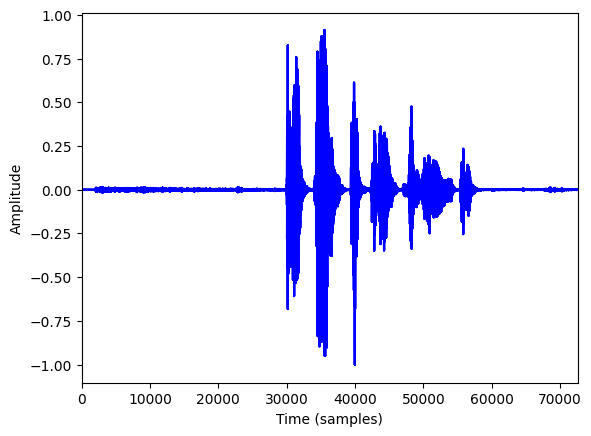

In [29]:
print_plot_play(x=y, Fs=16000, text=f'MP3 file: {filename.split("/")[-1]}')
IPython.display.Audio(data=y, rate=16000)

In [16]:
from datasets import Audio
# model was trained with 16khz audio files, then we need to adapt ours to the same format/sampling rate
common_voice = common_voice.cast_column("audio", Audio(sampling_rate=16000))

In [17]:
# re load first file
pprint(common_voice['train'][0])

{'accent': '',
 'age': '',
 'audio': {'array': array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
        8.0581793e-07, -5.0670457e-07, -3.2504367e-06], dtype=float32),
           'path': '/home/jgonzalez/.cache/huggingface/datasets/downloads/extracted/fde0b56b17d045d78dca0e88e6e6f123554984ad50d19aeadb1c680e7a3c9e86/common_voice_es_18338585.mp3',
           'sampling_rate': 16000},
 'client_id': '34719bb7c7344da7733b85c9d7215d24326093f1a2cd3a445bdc6dfe9ec4a8c9fe9729a73f6c29764545276bff81ffa65d3944f6da7a3ee3c06d0eb124fac797',
 'down_votes': 1,
 'gender': '',
 'locale': 'es',
 'path': '/home/jgonzalez/.cache/huggingface/datasets/downloads/extracted/fde0b56b17d045d78dca0e88e6e6f123554984ad50d19aeadb1c680e7a3c9e86/common_voice_es_18338585.mp3',
 'segment': '',
 'sentence': '¿ Qué tal a tres de cinco ?',
 'up_votes': 2}


- We load and resample the audio data by calling batch["audio"]. As explained above, 🤗 Datasets performs any necessary resampling operations on the fly.
- We use the feature extractor to compute the log-Mel spectrogram input features from our 1-dimensional audio array.
- We encode the transcriptions to label ids through the use of the tokenizer.


In [32]:
from transformers import WhisperFeatureExtractor
feature_extractor = WhisperFeatureExtractor.from_pretrained("openai/whisper-small")

In [18]:

def prepare_dataset(batch):
    # load and resample audio data from 48 to 16kHz
    audio = batch["audio"]

    # compute log-Mel input features from input audio array 
    batch["input_features"] = feature_extractor(audio["array"], sampling_rate=audio["sampling_rate"]).input_features[0]

    # encode target text to label ids 
    batch["labels"] = tokenizer(batch["sentence"]).input_ids
    return batch

In [19]:
# common_voice = common_voice.map(prepare_dataset, remove_columns=common_voice.column_names["train"][:4], num_proc=4)

In [31]:
pprint(common_voice.column_names["train"])

['client_id',
 'path',
 'audio',
 'sentence',
 'up_votes',
 'down_votes',
 'age',
 'gender',
 'accent',
 'locale',
 'segment']
